In [1]:
import time
import math
import numpy as np
import pandas as po
from tqdm import tqdm
import multiprocessing
import matplotlib.pyplot as plt

In [2]:
df = po.read_csv('data/EnergyConsumption_Theft.csv')
df = df.sample(frac=1).reset_index(drop = True) # shuffle df so that classes are evenly distributed in train-val-test

In [3]:
df = df.drop(['CONS_NO'], axis = 1)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0,10.80,13.23,12.21,14.15,8.41,8.74,10.13,12.590000,17.420000,...,12.26,14.27,9.40,10.42000,10.26,9.04000,11.16,8.64,11.10,7.22
1,0,13.34,12.83,14.62,16.94,13.78,14.21,15.94,16.820000,10.140000,...,13.03,14.04,16.16,17.02000,12.35,16.06000,15.77,14.58,13.77,12.39
2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.24,0.25,0.22,0.25000,0.23,0.23000,0.22,0.22,0.23,0.22
3,0,0.57,0.91,0.73,0.53,0.84,1.01,0.66,0.560000,0.580000,...,0.11,0.11,0.27,0.30000,0.28,1.14000,1.35,0.93,0.36,0.42
4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,5.53,4.98,3.68,7.23000,5.49,4.80000,4.59,3.82,3.51,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,3.06,0.53,1.40,0.42000,0.34,0.39000,2.66,1.44,0.48,0.48
42368,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,6.63,5.42,5.25,6.30000,5.11,5.94000,6.93,5.97,6.89,5.94
42369,0,9.14,7.23,9.70,8.29,6.66,6.50,7.77,13.510811,10.700000,...,5.45,7.15,7.83,7.35000,9.82,9.90000,7.02,9.64,8.01,8.72
42370,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,43.38,69.56,71.36,77.93916,73.67,77.93916,74.86,71.14,72.23,71.69


In [6]:
df['FLAG'].value_counts()

0    38757
1     3615
Name: FLAG, dtype: int64

In [7]:
df_min = df[df['FLAG'] == 1].reset_index(drop=True)

In [8]:
minor = df_min.drop('FLAG', axis=1).to_numpy()

In [ ]:
math.sqrt(len(minor))

In [10]:
k = 60

In [30]:
minor.shape

(3615, 1034)

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(minor)

In [14]:
distances, indices = nbrs.kneighbors(minor)

In [15]:
indices = indices[:, 1:]

In [16]:
indices.shape

(3615, 60)

In [17]:
def SNN(i, j):
    return len(np.intersect1d(indices[i], indices[j]))

In [18]:
snn_sim = {}

In [19]:
for i in tqdm(range(len(indices))):
    snn_sim[i] = {}
    for j in range(len(indices)):
        snn_sim[i][j] = SNN(i, j)

100%|██████████| 3615/3615 [04:26<00:00, 13.55it/s]


In [20]:
density = {}
for i in range(len(indices)):
    sum = 0
    for j in range(len(indices[i])):
        sum += snn_sim[i][j]
    
    density[i] = sum

In [21]:
density_ratio = {}
for i in range(len(indices)):
    neigh_dens = []
    for j in range(len(indices[i])):
        neigh_dens.append(density[indices[i][j]])
    neigh_dens = np.array(neigh_dens)
    density_ratio[i] = density[i]/np.mean(neigh_dens)

In [22]:
np.mean(np.array(list(density_ratio.values())))

0.872246604075523

In [23]:
np.std(np.array(list(density_ratio.values())))

0.22158539713638797

(array([  6.,  37., 132., 299., 556., 837., 984., 612., 135.,  17.]),
 array([0.01745708, 0.16566727, 0.31387746, 0.46208765, 0.61029783,
        0.75850802, 0.90671821, 1.05492839, 1.20313858, 1.35134877,
        1.49955895]),
 <a list of 10 Patch objects>)

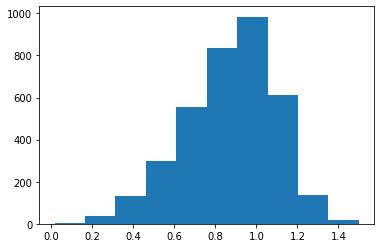

In [24]:
plt.hist(np.array(list(density_ratio.values())))

In [35]:
drT = 0.9# + 0.15*1.5

In [36]:
core_points = []
for i in range(len(density_ratio)):
    if density_ratio[i] > drT:
        core_points.append(i)

In [37]:
len(core_points)

1791

In [28]:
def reverse_nearest_neighbours_core(pt_index):
    rnns = []
    for i in range(len(indices)):
        if i!=pt_index:
            if pt_index in list(indices[i]):
                if i in core_points:
                    rnns.append(i)
    return rnns

In [38]:
lens = []
#core_pts + nearest_neighbours (there are too many)
directly_density_reachable_core_points = {} 
for cp_index in core_points: #Can't need actual values here
    dds = list(indices[cp_index]) 
    dds += reverse_nearest_neighbours_core(cp_index)
    
    dds = list(set(dds))
    dds.sort()
    
    lens.append(len(dds))
    directly_density_reachable_core_points[cp_index] = dds

In [29]:
lens = np.array(lens)

NameError: name 'lens' is not defined

In [ ]:
core_points[12]

In [41]:
len(directly_density_reachable_core_points[22])

73

In [42]:
clusters = {}

def is_ddr(pt_1, pt_2):
    if pt_2 in indices[pt_1]:
        return True
    
    elif pt_2 in reverse_nearest_neighbours_core(pt_1):
        return True
    
    else:
        return False

dds_core_pts = {}
for cp_index in tqdm(core_points):
    dds_core_pts[cp_index] = {}
    for cp_2 in tqdm(core_points):
        if is_ddr(cp_index, cp_2):
            dds_core_pts[cp_index] = cp_2

In [ ]:
outliers = []
for i in range(len(indices)):
    count = 0
    
    for core_pt in directly_density_reachable_core_points:
        if i in directly_density_reachable_core_points[core_pt]:
            count += 1
            break # if the point is even in one dds then it's not an outlier
    
    if count == 0:
        outliers.append(i)   
len(outliers)

In [38]:
SNNs = list(map(SNN, range()))

len(SNNs)

SNNs

start = time.process_time()
for i in range(len(minor)):
    
start = time.process_time()
for i in range(len(minor)):
    for j in range(len(minor)):
        np.intersect1d(indices[i], indices[j])
print(time.process_time() - start)

arr_ind = 23

def knn(arr_ind):
    norms = np.zeros(len(minor),)
    for i in range(len(minor)):
        if arr_ind == i:
            continue
        norms[i] = np.linalg.norm(minor[i]-minor[arr_ind], ord=2)
    
    norms = norms.argsort()
    return list(norms[:k])

p = multiprocessing.Pool()

def calc_norm(i):
    if arr_ind == i:
        return np.inf
    return np.linalg.norm(minor[i]-minor[arr_ind], ord=2)

def knn(arr_ind):    
    
    start = time.process_time()
    #norms = list(map(calc_norm, range(len(minor))))
    norms = p.map(calc_norm, range(len(minor)))
    print(time.process_time() - start)
        
    norms = np.array(norms).argsort()
    
    return list(norms[:k])

minor[1322]

knn_idx = knn(1322)
knn_idx

knn_idx = knn(1322)

minor[knn_idx, :]

minor[knn_idx, :].shape

arr_ind = 23
knns_self = knn(arr_ind) 



for i in range(100):
    snn_mp(i)
snn_mp_out = map(snn_mp, range(100))

snn_mp_out = map(snn_mp, range(len(minor)))

3000/60

def snn(arr_ind):
    knns_self = knn(arr_ind)
    
    snn_sim = []
    for i in tqdm(range(len(minor))):
        if arr_ind == i:
            snn_sim.append([])
        
        else: 
            knns_other = knn(i)
            #snn_sim.append(list(set(knns_other) & set(knns_self))) 
            snn_sim.append(list(set(knns_self).intersection(knns_other))) 
            
    return snn_sim

sims = snn(23)

snn_sim = snn(23)

len(snn_sim)

np.linalg.norm(np.random.randn(100, 1) - np.random.randn(100, 1), ord=2)